# Problem statment
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

In [2]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the Dataset with Pandas:
# Reading the csv file from dataset
df = pd.read_csv(r'baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

In [4]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
df.sample(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
21,83,703,5428,1363,265,13,177,539,1344,57,635,577,3.62,4,13,41,90


In [6]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [7]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [8]:
df.columns.value_counts().sum()

17

Total columns=17 , 16= independent variables,  1= target or dependent variable

In [9]:
# Checking the dimension of the dataset
df.shape

(30, 17)

In [10]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [11]:
# Checking the types of the dataset
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [12]:
#Checking null values in the Dataset:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

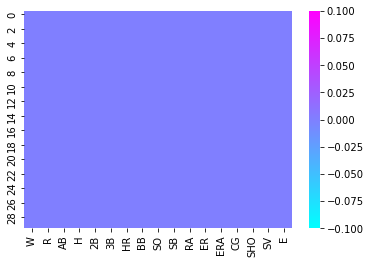

In [13]:
#checking the null values Using heatmap:
sns.heatmap(df.isnull(), cmap='cool')

so we dont have any null values in the dataset

# Exploration of Data & Visualization:

<AxesSubplot:title={'center':'Comparision between W and R'}, xlabel='W', ylabel='R'>

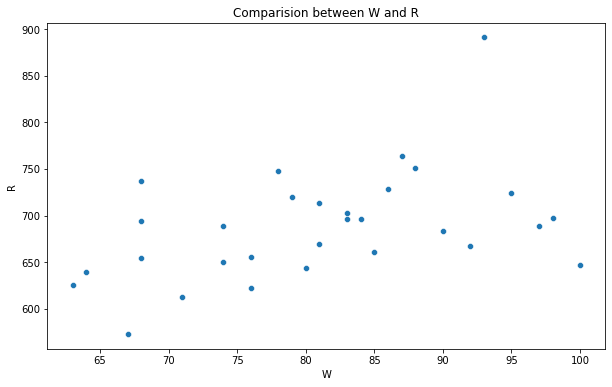

In [14]:
#Bivariate Analysis
#Checking the relation between TV and radio on the basis of sales
plt.figure(figsize=[10,6])
plt.title('Comparision between W and R')
sns.scatterplot(df['W'],df['R'])

<AxesSubplot:title={'center':'Comparision between W and AB'}, xlabel='W', ylabel='AB'>

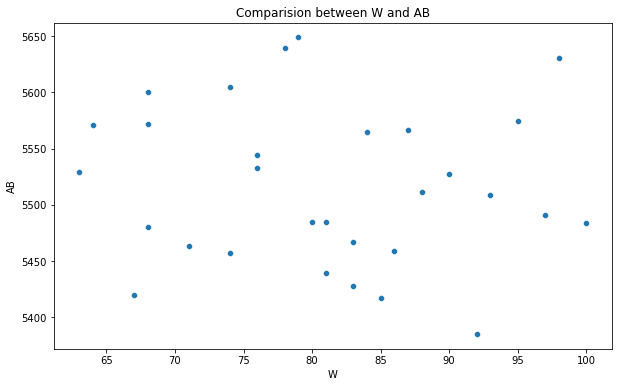

In [15]:
#Bivariate Analysis
#Checking the relation between W and AB 
plt.figure(figsize=[10,6])
plt.title('Comparision between W and AB')
sns.scatterplot(df['W'],df['AB'])

<AxesSubplot:title={'center':'Comparision between W and H'}, xlabel='W', ylabel='H'>

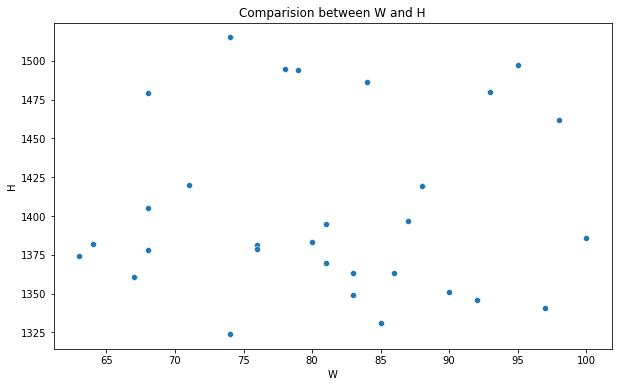

In [16]:
#Bivariate Analysis
#Checking the relation between W and H 
plt.figure(figsize=[10,6])
plt.title('Comparision between W and H')
sns.scatterplot(df['W'],df['H'])

<AxesSubplot:title={'center':'Comparision between W and 2B'}, xlabel='W', ylabel='2B'>

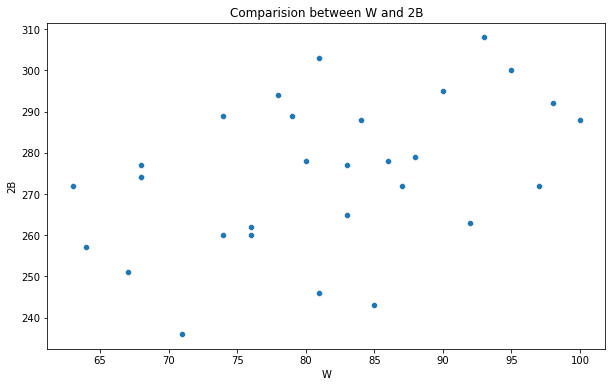

In [17]:
#Bivariate Analysis
#Checking the relation between W and 2B 
plt.figure(figsize=[10,6])
plt.title('Comparision between W and 2B')
sns.scatterplot(df['W'],df['2B'])

<AxesSubplot:title={'center':'Comparision between W and 3B'}, xlabel='W', ylabel='3B'>

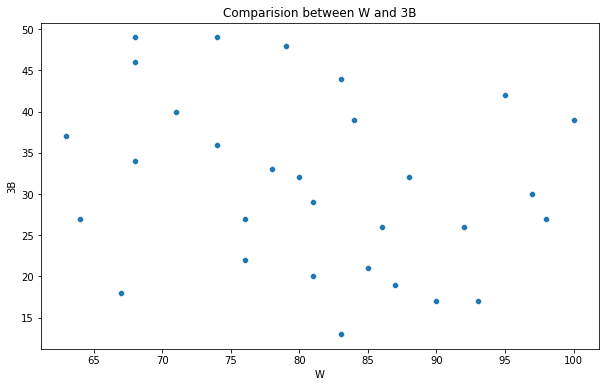

In [18]:
#Bivariate Analysis
#Checking the relation between W and 3B 
plt.figure(figsize=[10,6])
plt.title('Comparision between W and 3B')
sns.scatterplot(df['W'],df['3B'])

<AxesSubplot:title={'center':'Comparision between W and HR'}, xlabel='W', ylabel='HR'>

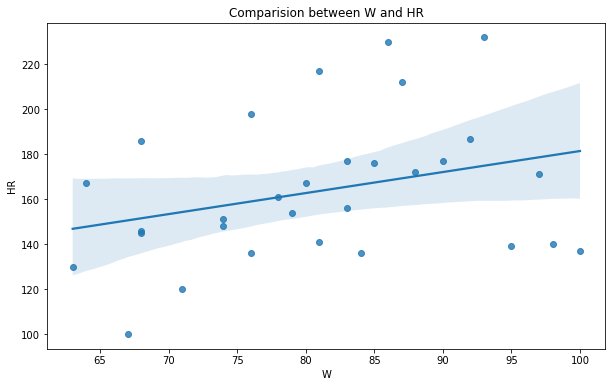

In [19]:
#Bivariate Analysis
#Checking the relation between W and HR 
plt.figure(figsize=[10,6])
plt.title('Comparision between W and HR')
sns.regplot(df['W'],df['HR'])

<AxesSubplot:title={'center':'Comparision between W and BB'}, xlabel='W', ylabel='BB'>

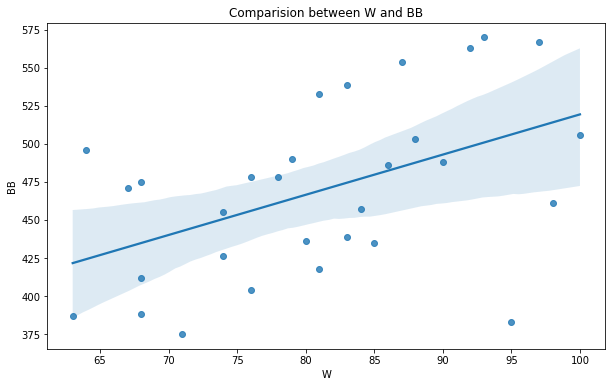

In [20]:
#Bivariate Analysis
#Checking the relation between W and BB 
plt.figure(figsize=[10,6])
plt.title('Comparision between W and BB')
sns.regplot(df['W'],df['BB'])

<AxesSubplot:title={'center':'Comparision between W and SO'}, xlabel='W', ylabel='SO'>

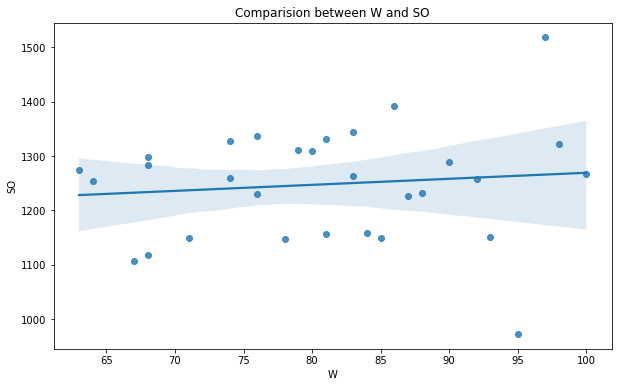

In [21]:
#Bivariate Analysis
#Checking the relation between W and SO 
plt.figure(figsize=[10,6])
plt.title('Comparision between W and SO')
sns.regplot(df['W'],df['SO'])

<AxesSubplot:title={'center':'Comparision between W and SB'}, xlabel='W', ylabel='SB'>

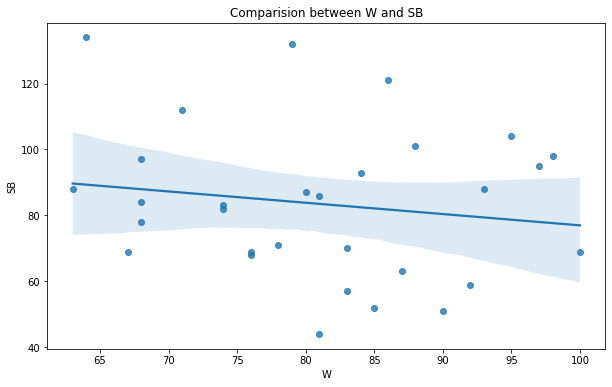

In [22]:
#Bivariate Analysis
#Checking the relation between W and SB 
plt.figure(figsize=[10,6])
plt.title('Comparision between W and SB')
sns.regplot(df['W'],df['SB'])

<AxesSubplot:title={'center':'Comparision between W and RA'}, xlabel='W', ylabel='RA'>

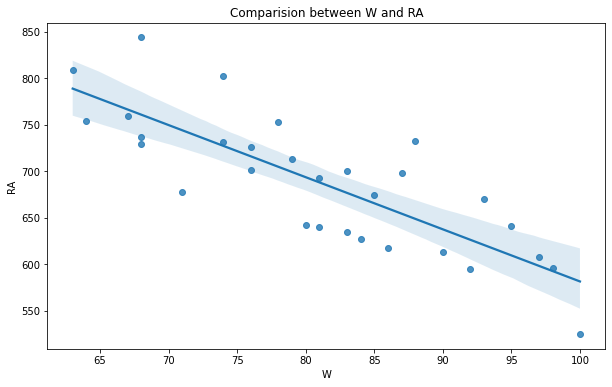

In [23]:
#Bivariate Analysis
#Checking the relation between W and RA 
plt.figure(figsize=[10,6])
plt.title('Comparision between W and RA')
sns.regplot(df['W'],df['RA'])

<AxesSubplot:title={'center':'Comparision between W and ER'}, xlabel='W', ylabel='ER'>

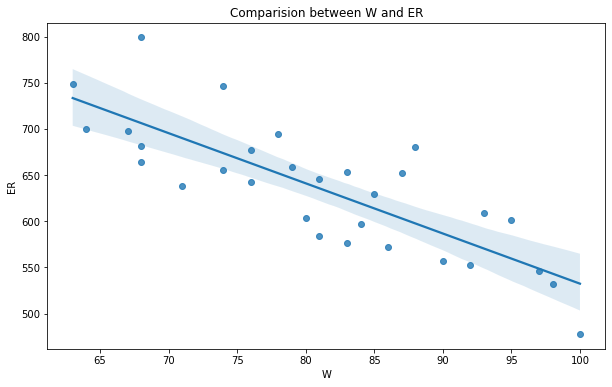

In [24]:
#Bivariate Analysis
#Checking the relation between W and ER 
plt.figure(figsize=[10,6])
plt.title('Comparision between W and ER')
sns.regplot(df['W'],df['ER'])

<AxesSubplot:title={'center':'Comparision between W and ERA'}, xlabel='W', ylabel='ERA'>

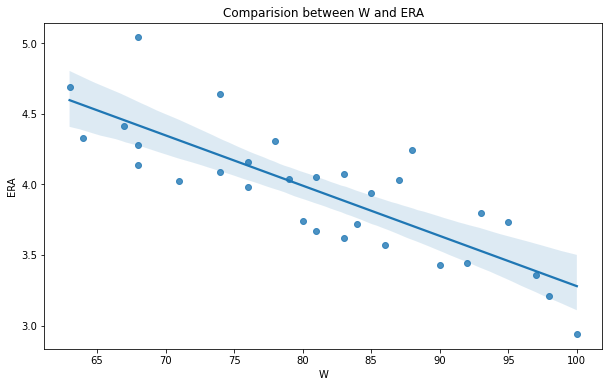

In [25]:
#Bivariate Analysis
#Checking the relation between W and ERA 
plt.figure(figsize=[10,6])
plt.title('Comparision between W and ERA')
sns.regplot(df['W'],df['ERA'])

<AxesSubplot:title={'center':'Comparision between W and CG'}, xlabel='W', ylabel='CG'>

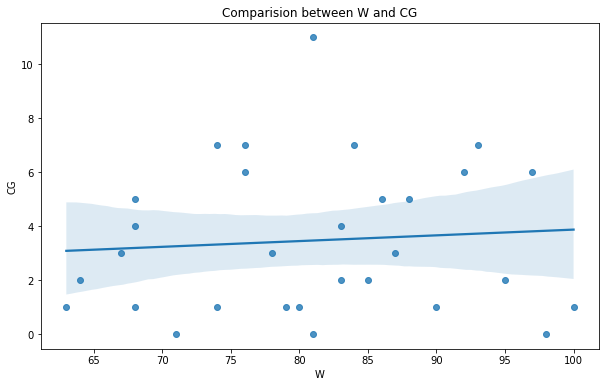

In [26]:
#Bivariate Analysis
#Checking the relation between W and CG 
plt.figure(figsize=[10,6])
plt.title('Comparision between W and CG')
sns.regplot(df['W'],df['CG'])

<AxesSubplot:title={'center':'Comparision between W and SHO'}, xlabel='W', ylabel='SHO'>

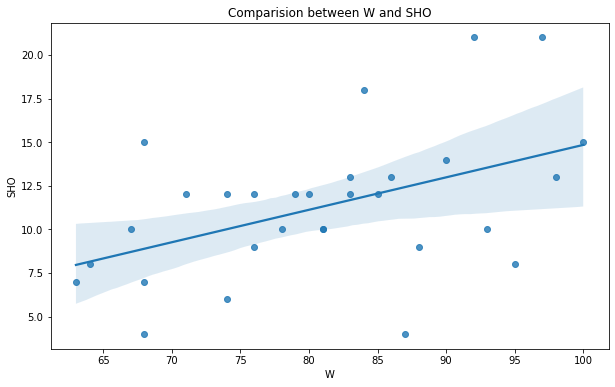

In [27]:
#Bivariate Analysis
#Checking the relation between W and SHO 
plt.figure(figsize=[10,6])
plt.title('Comparision between W and SHO')
sns.regplot(df['W'],df['SHO'])

<AxesSubplot:title={'center':'Comparision between W and SV'}, xlabel='W', ylabel='SV'>

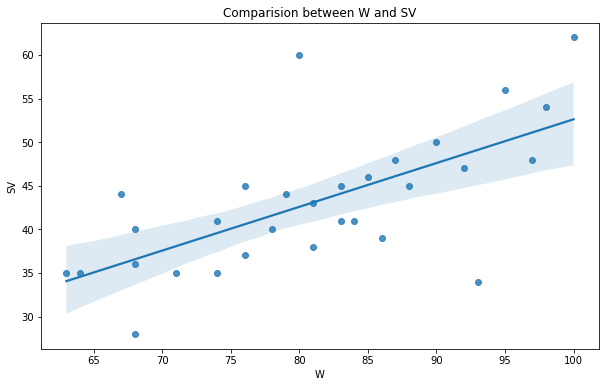

In [28]:
#Bivariate Analysis
#Checking the relation between W and SV
plt.figure(figsize=[10,6])
plt.title('Comparision between W and SV')
sns.regplot(df['W'],df['SV'])

<AxesSubplot:title={'center':'Comparision between W and E'}, xlabel='W', ylabel='E'>

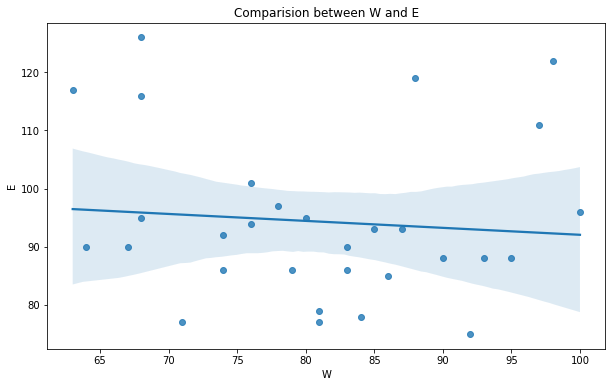

In [29]:
#Bivariate Analysis
#Checking the relation between W and E
plt.figure(figsize=[10,6])
plt.title('Comparision between W and E')
sns.regplot(df['W'],df['E'])

# Multivariate analysis

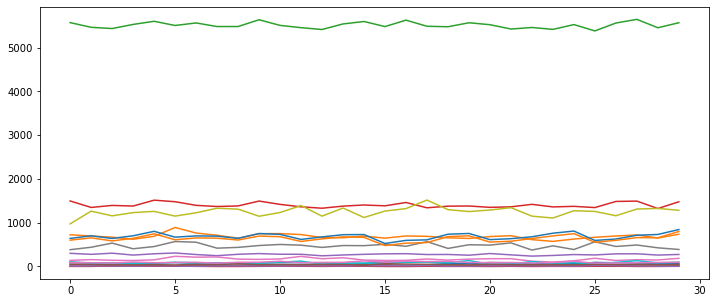

In [30]:
plt.figure(figsize=(12,5))
plt.plot(df)

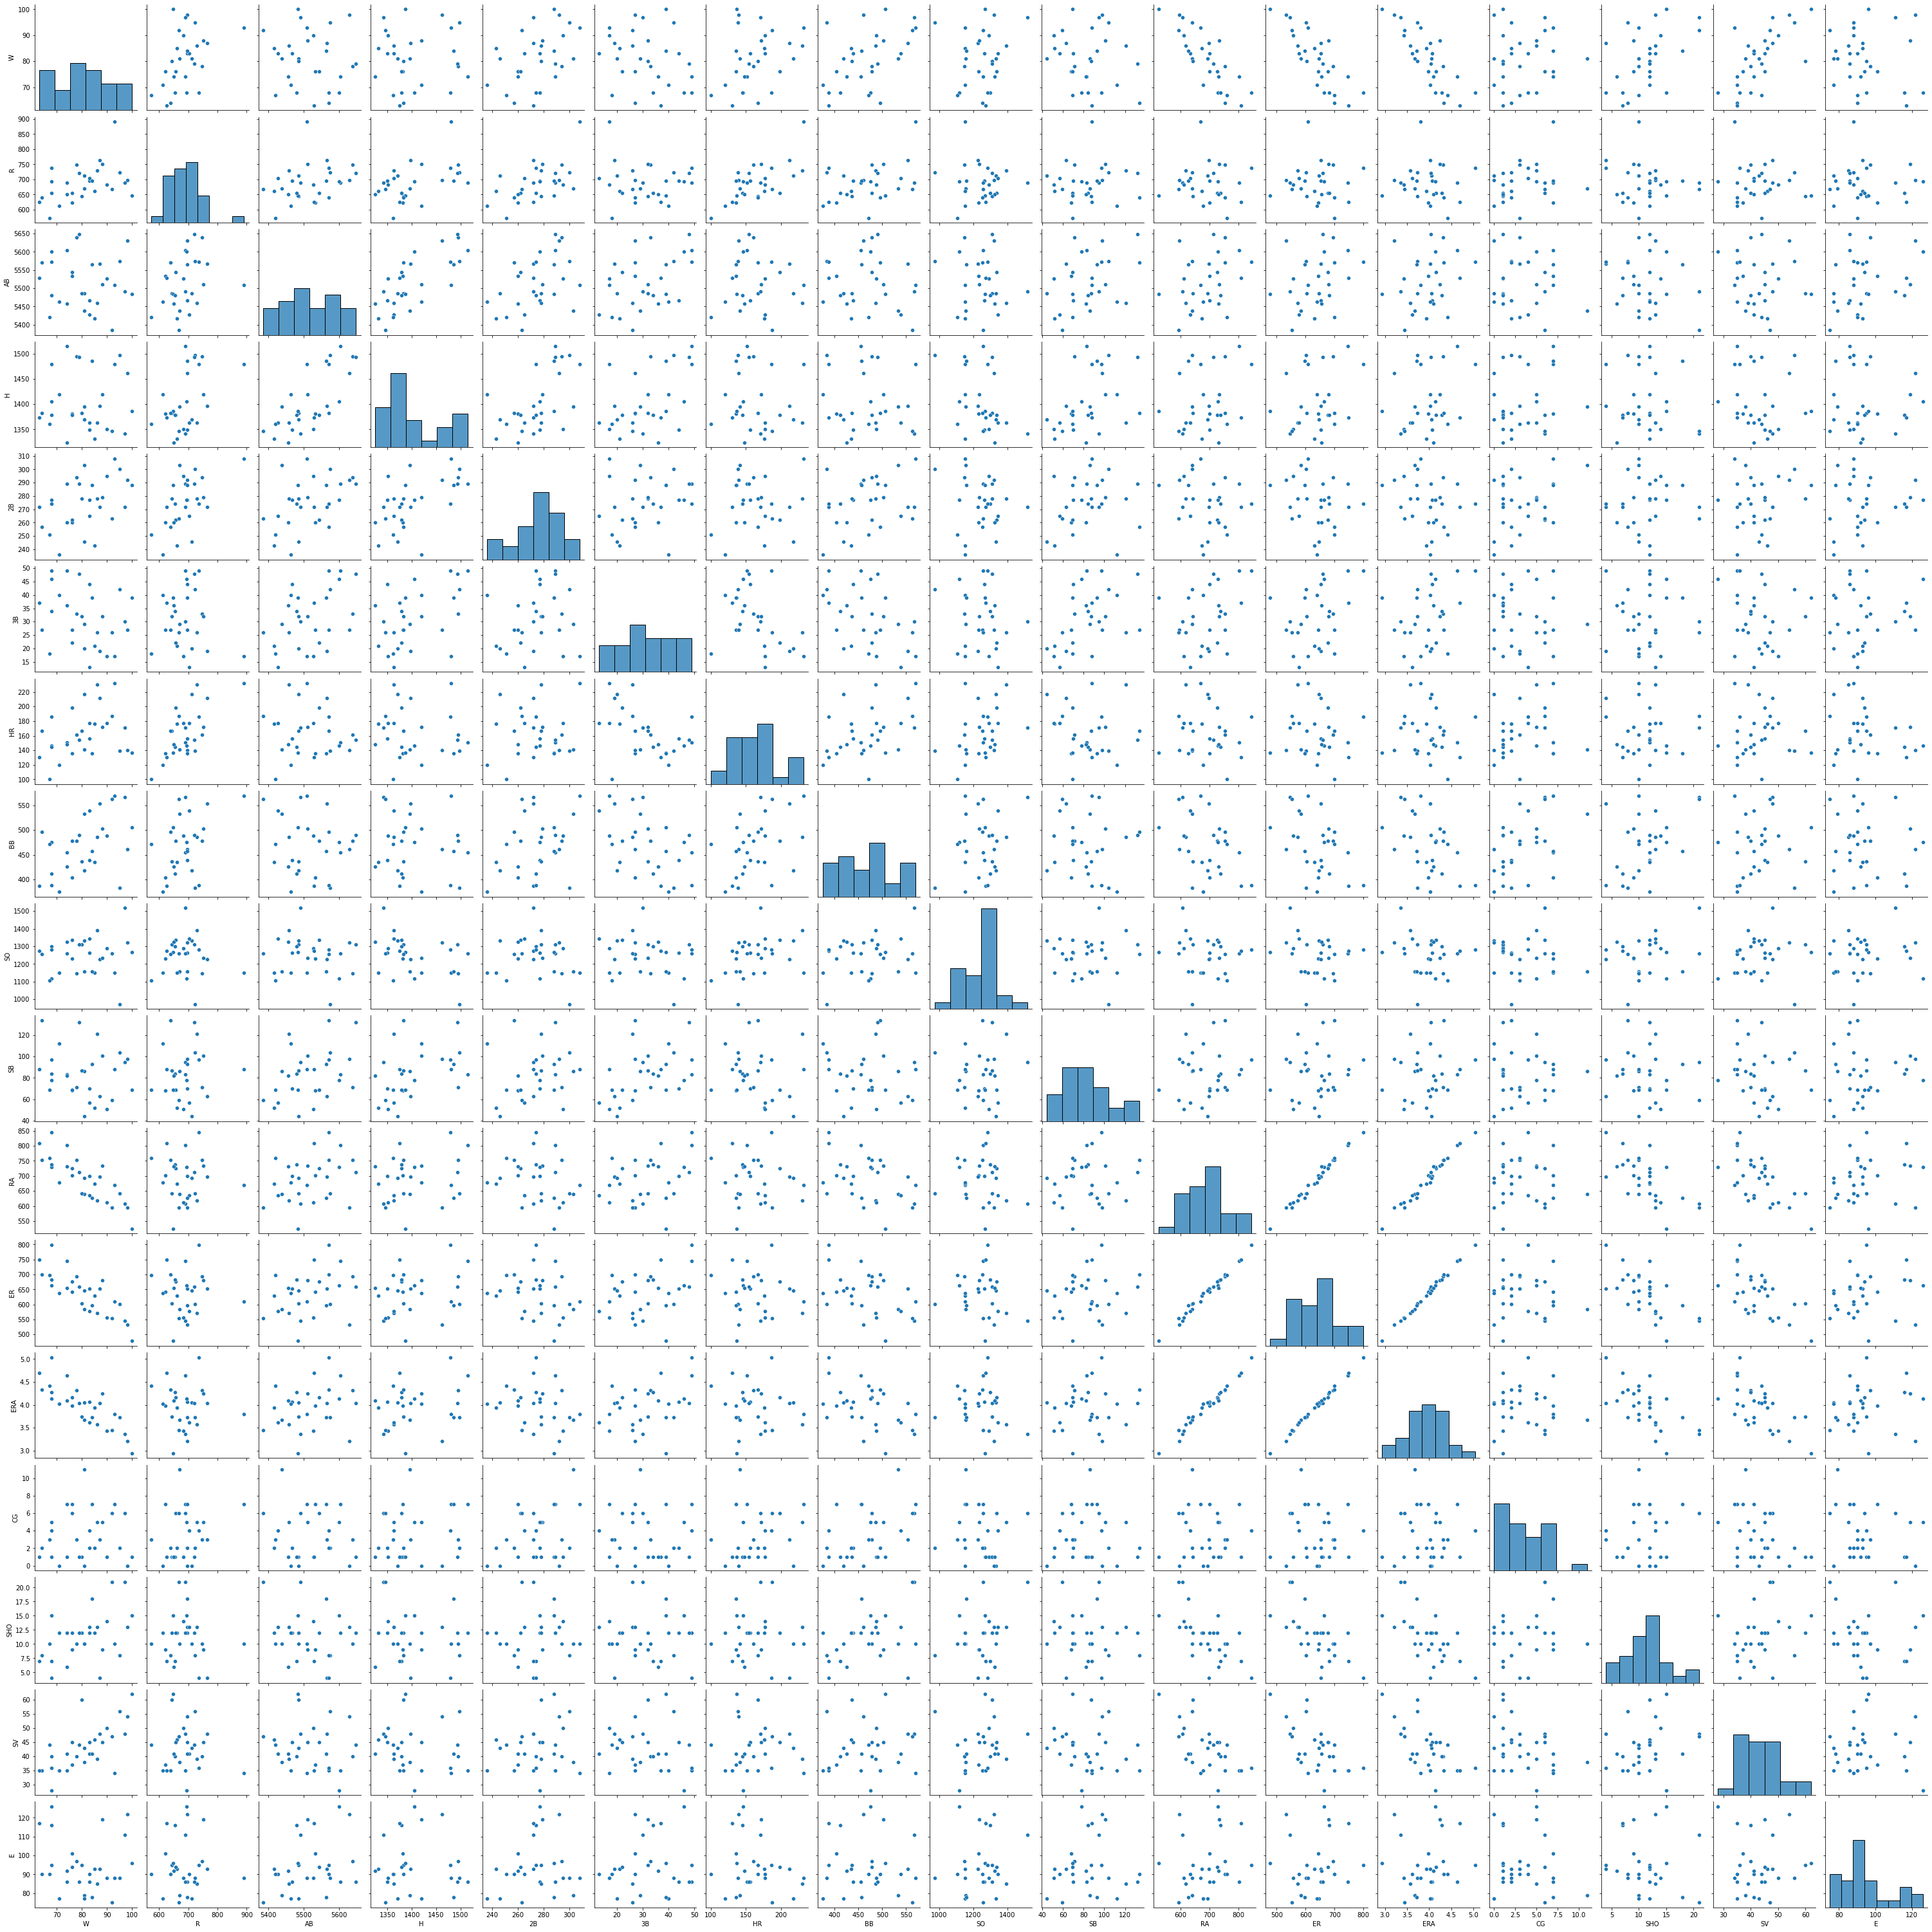

In [31]:
#multivariate analysis
# Checking the pairwise relation in the dataset.

sns.pairplot(df,palette='Set9')

# Correlation Analysis

In [32]:
dfcor = df.corr()
dfcor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

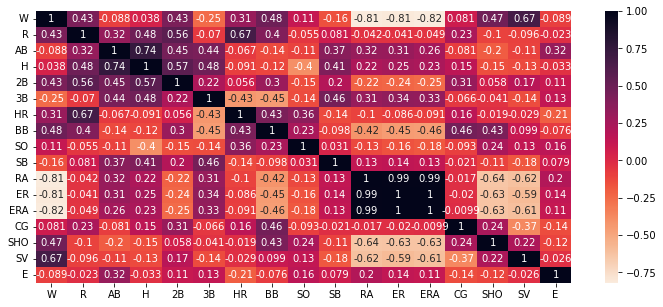

In [33]:
#Showing the heatmap with the correlation
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),cmap='rocket_r',annot=True)

In [34]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [35]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# Checking for the Outliers

<AxesSubplot:>

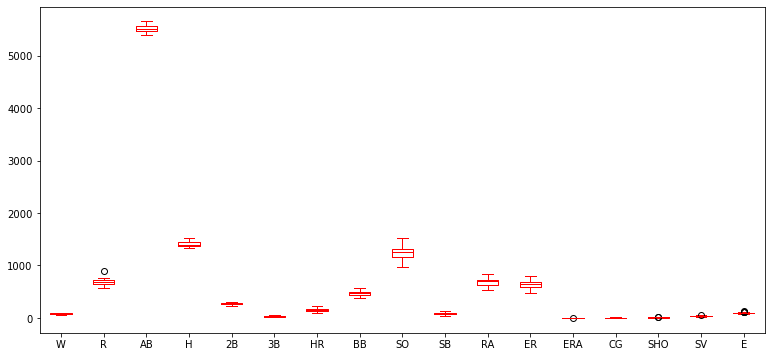

In [36]:
df.plot(kind="box", figsize = (13,6), color="r")

<AxesSubplot:xlabel='R'>

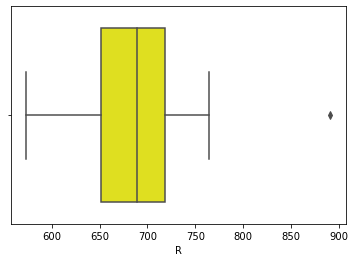

In [37]:
sns.boxplot(data=df, x='R' , color='yellow')

<AxesSubplot:xlabel='SHO'>

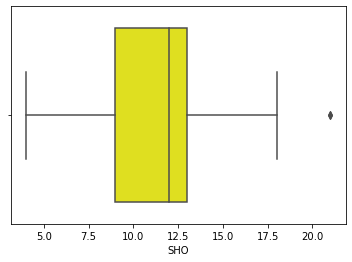

In [38]:
sns.boxplot(data=df, x='SHO', color='yellow')

<AxesSubplot:xlabel='ERA'>

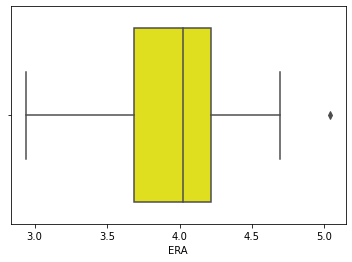

In [39]:
sns.boxplot(data=df, x='ERA' , color='yellow')

<AxesSubplot:xlabel='E'>

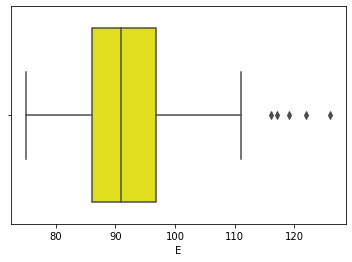

In [40]:
sns.boxplot(data=df, x='E',color='yellow')

# Removing outliers

In [41]:
#Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(df))
print('old_data:',df.shape)
data_final=df.loc[(z_score<3).all(axis=1)]
print(' new_data:',data_final.shape)

old_data: (30, 17)
 new_data: (29, 17)


In [42]:
# Let's check the the data loss
data_loss = (30-29)/30*100
data_loss

3.3333333333333335

In [43]:
#Splitting into x and y
x =data_final.drop(['W'], axis=1)
y = data_final.iloc[:,0]


In [44]:
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [45]:
#Transforming & removing the skewness
from sklearn.preprocessing  import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 9.62543504e-01,  0.00000000e+00,  0.00000000e+00,
         1.68518793e+00,  1.00615029e+00, -7.41927000e-01,
        -1.60519802e+00, -2.55061247e+00,  9.36131648e-01,
        -6.60978697e-01, -5.08052227e-01, -5.09292146e-01,
        -3.07098204e-01, -7.87002186e-01,  1.53275292e+00,
        -3.48265262e-01],
       [ 2.98863300e-01,  0.00000000e+00,  0.00000000e+00,
         1.38197902e-01,  1.18522654e+00, -1.09958425e-01,
        -4.62095966e-01,  9.36832915e-02, -5.16377335e-01,
         1.60225829e-01,  2.35800484e-01,  2.41440214e-01,
        -3.07098204e-01,  2.36736538e-01,  3.12020186e-01,
        -5.40819806e-01],
       [-3.12105130e-01,  0.00000000e+00,  0.00000000e+00,
         1.90738550e+00, -2.28819392e-01, -6.64354121e-01,
         1.23209786e+00, -9.35611465e-01,  2.25038365e-01,
        -6.74967476e-01, -7.52213883e-01, -6.42097599e-01,
         2.01131531e+00, -2.52844176e-01, -6.64136739e-01,
        -1.32612477e+00],
       [-1.30829774e+00,  0.00000000e

In [46]:
#Lets Again Check the Skewness
x= pd.DataFrame(x)
x.skew()

0    -0.024842
1     0.000000
2     0.000000
3    -0.052793
4    -0.075139
5     0.000448
6    -0.008572
7     0.051530
8    -0.009570
9    -0.011974
10   -0.004988
11   -0.000401
12   -0.045947
13    0.000529
14   -0.000925
15    0.065585
dtype: float64

<Figure size 1008x720 with 0 Axes>

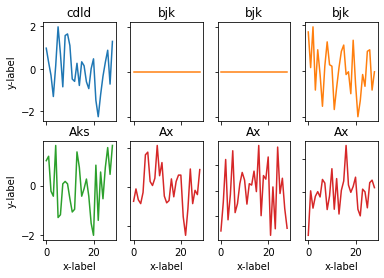

In [47]:
#ploting all the Normal distribution plots
plt.figure(figsize=(14,10))
fig, axs = plt.subplots(2,4)
axs[0, 0].plot(x[0])
axs[0, 0].set_title('cdld')
axs[0, 1].plot(x[1], 'tab:orange')
axs[0, 1].set_title('bjk')
axs[0, 2].plot(x[2], 'tab:orange')
axs[0, 2].set_title('bjk')
axs[0, 3].plot(x[3], 'tab:orange')
axs[0, 3].set_title('bjk')

axs[1, 0].plot(x[4], 'tab:green')
axs[1, 0].set_title('Aks')
axs[1, 1].plot(x[5], 'tab:red')
axs[1, 1].set_title('Ax')
axs[1, 2].plot(x[6], 'tab:red')
axs[1, 2].set_title('Ax')
axs[1, 3].plot(x[7], 'tab:red')
axs[1, 3].set_title('Ax')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [48]:
#data preprocessing
#Feature engineering & feature extraction
#using the Variance threshold method

from sklearn.feature_selection import VarianceThreshold
# we are  importing  the  sklearn's  feature  selection technique  here  to extract  some imp  feature   from  the  model
var_thres = VarianceThreshold(threshold=0.0)
var_thres.fit(x)

VarianceThreshold()

In [49]:
var_thres.get_support()

array([ True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [50]:
x.columns[var_thres.get_support()]

Int64Index([0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64')

This says us that leaving 1,2 number column all are important thus we can drop them

In [51]:
# taking  out  all the  constant  columns 
cons_columns = [column for column in x.columns
               if column not in x.columns[var_thres.get_support()]]
print(len(cons_columns))

2


In [52]:
# dropping  the  column 1 and 2 
x.drop([1,2],axis=1, inplace=True)

In [53]:
x.head()

,0,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.962544,1.685188,1.006150,-0.741927,-1.605198,-2.550612,0.936132,-0.660979,-0.508052,-0.509292,-0.307098,-0.787002,1.532753,-0.348265
1,0.298863,0.138198,1.185227,-0.109958,-0.462096,0.093683,-0.516377,0.160226,0.235800,0.241440,-0.307098,0.236737,0.312020,-0.540820
2,-0.312105,1.907385,-0.228819,-0.664354,1.232098,-0.935611,0.225038,-0.674967,-0.752214,-0.642098,2.011315,-0.252844,-0.664137,-1.326125
3,-1.308298,-0.837665,-0.432228,-0.860039,-1.162721,-0.230683,-0.618422,0.174077,0.093091,0.043013,1.264463,-0.513555,-0.820689,0.650818
4,0.137737,0.911435,1.622636,-0.289647,-0.155686,0.044143,0.095038,1.575971,1.555853,1.493491,1.264463,0.236737,-1.149165,-0.540820


# checking for the VIF

In [54]:
import numpy as np
import pandas  as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
def  calcvif(x):
    vif =pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [56]:
x = x.iloc[:,:-1]
calcvif(x) 

,variables,VIF factor
0,0,3.652063
1,3,2.757762
2,4,2.949272
3,5,5.815040
4,6,3.087869
5,7,2.913134
6,8,2.056055
7,9,163.344218
8,10,599.761540
9,11,317.649430


As we can se that the 9 , 10, 11 has the max VIF so we need to drop it one by one

In [57]:
x.drop([10], axis=1,inplace=True)

In [63]:
x = x.iloc[:,:-1]
calcvif(x) 

,variables,VIF factor
0,0,3.526891
1,3,2.428879
2,4,2.432183
3,5,4.310547
4,6,2.764207
5,7,2.319168
6,8,1.522052
7,9,61.637526
8,11,70.128744
9,12,1.738937


# creating the Model for the predictions

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [71]:
from sklearn.ensemble import RandomForestRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .22, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.7710849029475195 on random_state: 46


In [72]:
x_train.shape

(22, 10)

In [74]:
y_train.shape

(22,)

In [75]:
# doing  train test  split
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.22, random_state=99)

In [76]:
# Checking R2 score for Random Forest Regressor
lr= LinearRegression()
lr.fit(x_train,y_train)

# prediction
predlr= lr.predict(x_test)
print('R2_Score:',r2_score(y_test,predlr))
print('Mean abs error:',mean_absolute_error(y_test, predlr))
print('Mean squared error:',mean_squared_error(y_test, predlr))

R2_Score: 0.4489286920093696
Mean abs error: 6.789851712385911
Mean squared error: 74.76575623513698


In [78]:
#Random forest Regressor
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor(n_estimators=600, random_state=99, max_depth=4, bootstrap=True, verbose=1)
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('Mean abs error:',mean_absolute_error(y_test, predRFR))
print('Mean squared error:',mean_squared_error(y_test, predRFR))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


R2_Score: 0.7993284818753887
Mean abs error: 4.465581996046282
Mean squared error: 27.225801071273796


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished


In [79]:
#Using the KNN Regressor
# Checking R2 score for KNN regressor
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=6, weights='uniform')
knn.fit(x_train,y_train)

#prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('Mean abs error:',mean_absolute_error(y_test, predknn))
print('Mean squared error:',mean_squared_error(y_test, predknn))

R2_Score: 0.7291583099344835
Mean abs error: 4.857142857142855
Mean squared error: 36.74603174603171


In [80]:
#Stochastic Gradient Descent Regressor
# Checking R2 score for SGD Regressor
SGD=SGDRegressor(epsilon=1, max_iter=500, alpha=0.001,fit_intercept=True)
SGD.fit(x_train,y_train)

#prediction
predSGD=SGD.predict(x_test)
print('R2_Score:',r2_score(y_test,predSGD))
print('Mean abs error:',mean_absolute_error(y_test, predSGD))
print('Mean squared error:',mean_squared_error(y_test, predSGD))

R2_Score: 0.735222845050029
Mean abs error: 5.483258823057402
Mean squared error: 35.92323522668179


In [81]:
#gradient Boosting Regressor
# Checking R2 score for svr
from sklearn.ensemble import GradientBoostingRegressor
Gb= GradientBoostingRegressor(n_estimators=600,  random_state=99, learning_rate=1, max_depth=4)
Gb.fit(x_train,y_train)

#prediction
predGb=Gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predGb))
print('Mean abs error:',mean_absolute_error(y_test, predGb))
print('Mean squared error:',mean_squared_error(y_test, predGb))

R2_Score: 0.3921194850706978
Mean abs error: 7.952920567087237
Mean squared error: 82.47325843367351


# Cross validation of each model

In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
# Checking cv score for Linear Regression
print('The CV score  for Linear_regression is :',cross_val_score(LR,x,y,cv=7).mean())

The CV score  for Linear_regression is : 0.25957174552678675


In [85]:
# Checking cv score for Random Forest Regression
print("The CV  score for  the Random forest regressor is:",cross_val_score(RFR,x,y,cv=7).mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

The CV  score for  the Random forest regressor is: -0.14998133561689958


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished


In [86]:
# Checking cv score for KNN Regression
print('The CV score  for  the KNN regressor is :',cross_val_score(knn,x,y,cv=7).mean())

The CV score  for  the KNN regressor is : 0.27328558749454335


In [87]:
# Checking cv score for SGD Regression
print('The  CV score for the SGD  regressor is :',cross_val_score(SGD,x,y,cv=7).mean())

The  CV score for the SGD  regressor is : 0.2712281564960803


In [88]:
#Gradient boosting
cross_val_score(Gb,x,y,cv=7).mean()

-1.3130415042883605

# Hyperparameter tuning

In [89]:
from sklearn.model_selection import GridSearchCV
#RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,400],
             'max_depth':[2,4,6]}
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=6)
GCV.fit(x_train,y_train)

GridSearchCV(cv=6, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 400]})

In [90]:
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 2,
 'max_features': 'sqrt',
 'n_estimators': 400}

In [91]:
Add_sales = RandomForestRegressor(criterion='mae', max_depth=6, max_features='auto', n_estimators=300)
Add_sales.fit(x_train, y_train)
pred_GCV = Add_sales.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_GCV)*100)

R2_Score: 78.73953248261799


In [92]:
#Saving the model
import joblib

joblib.dump(Add_sales,'Add_Sales_Channel.obj')

['Add_Sales_Channel.obj']

In [93]:
loadmodel = joblib.load('Add_Sales_Channel.obj')


In [94]:
#Conclusion & prediction by the final model
import numpy as np
a = np.array(y_test)
predicted = np.array(loadmodel.predict(x_test))
df_com = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_com

,Original,Predicted
0,67,72.465000
1,63,70.891667
2,97,87.956667
3,76,77.311667
4,83,86.250000
5,92,88.113333
6,86,86.773333
